In [1]:
import pandas as pd
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()

In [2]:
df = pd.DataFrame(data)

NameError: name 'data' is not defined

In [3]:
import joblib

In [4]:
#joblib.dump(df , 'salaryData.pk1')

In [5]:
#df=joblib.load("salaryData.pk1")

In [6]:
import numpy as np
df = df.replace("", np.nan)

In [7]:
import pandas as pd

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = df[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)

In [9]:
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127.0,"Redwood City, CA",1.5,1.5,NaN,107.0,20.0,10.0,NaN,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100.0,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310.0,"Seattle, WA",8.0,0.0,NaN,155.0,NaN,NaN,NaN,NaN
3,2017-06-13 05:35:36,Uber,Senior,Software Engineer,578.0,"San Francisco, CA",10.0,2.0,NaN,180000.0,1550000.0,9000.0,NaN,Stock based on $48.65 per share.
4,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,200.0,"Redmond, WA",9.0,9.0,NaN,169000.0,100000.0,30000.0,NaN,NaN


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Bad key "text.kerning_factor" on line 4 in
/home/rudra/anaconda3/envs/MLOPS_DL/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [11]:
df = df[df['totalyearlycompensation'].between(df['totalyearlycompensation'].quantile(.05),df['totalyearlycompensation'].quantile(.95))]

In [12]:
totalyearlycompensation=df["totalyearlycompensation"]

### graph on totalyearlycompensation

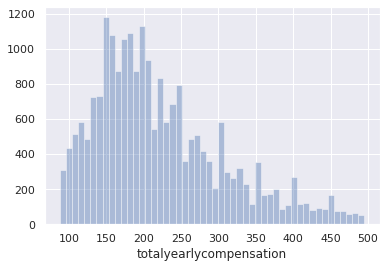

In [13]:
sns.distplot(totalyearlycompensation , kde=False, bins=50)

### Graph of stockgrantvalue vs totalyearlycompensation

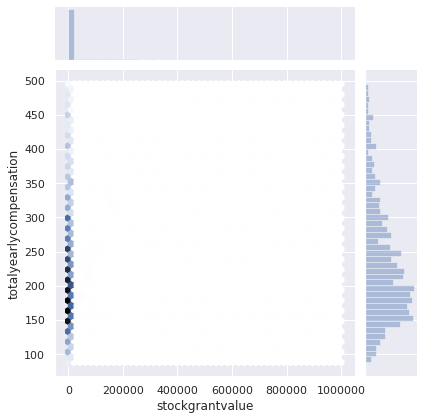

In [14]:
sns.jointplot(data=df, x='stockgrantvalue' , y='totalyearlycompensation', kind='hex')

### pairing all the features with one another

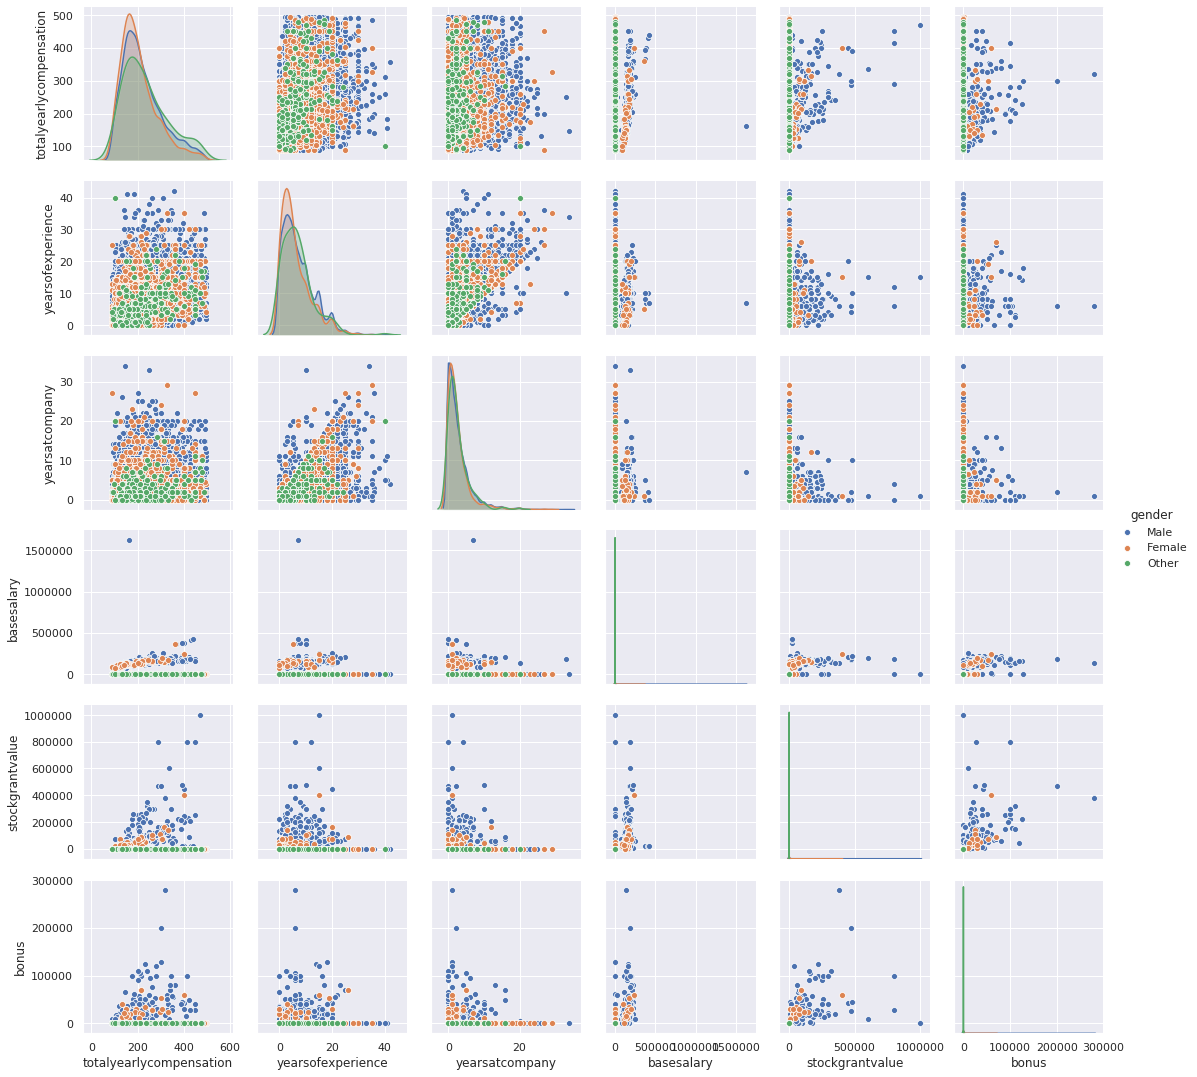

In [16]:
sns.pairplot(df,hue='gender')

### Gender bar graph

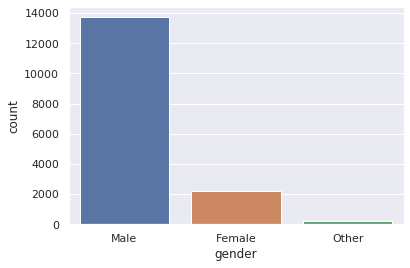

In [17]:
sns.countplot(data=df, x='gender')

### fetching data from dataset using query() and showing graph.

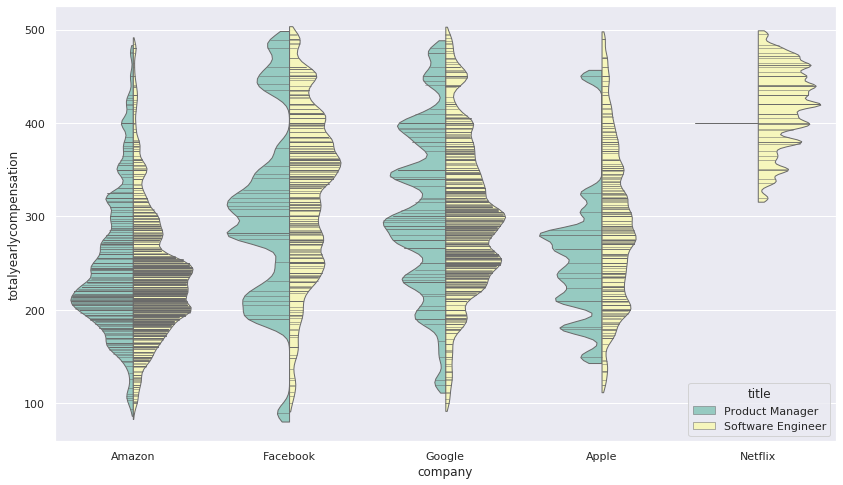

In [18]:
com_data = df.query("company in ('Facebook','Amazon','Apple','Netflix','Google') and title in ('Product Manager','Software Engineer') and yearsofexperience>4 and yearsofexperience<16")
plt.figure(figsize=(14, 8))
g = sns.violinplot(data=com_data, palette="Set3", split = True, x='company',hue='title',y='totalyearlycompensation',
                   inner='stick', bw=.1, cut=1, linewidth=1)

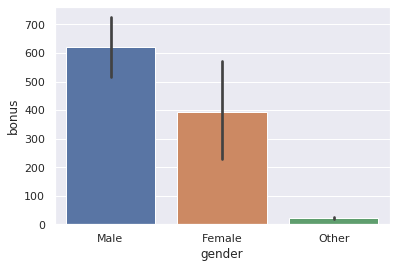

In [19]:
sns.barplot(data=df, x='gender' ,  y='bonus' )

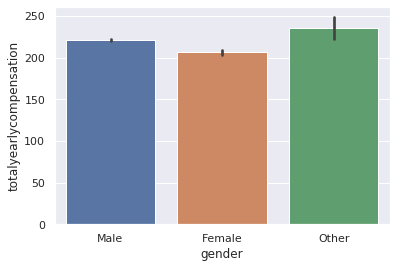

In [20]:
sns.barplot(data=df, x='gender' ,  y='totalyearlycompensation' )

### Heat graph on complete dataset

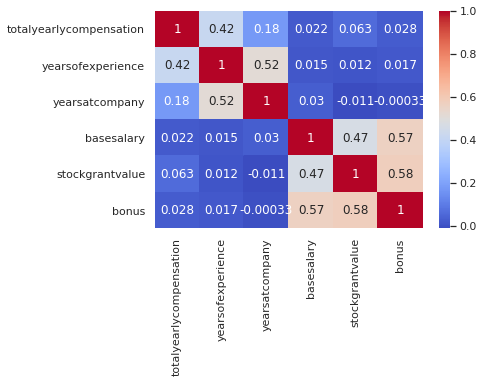

In [21]:
sns.heatmap(df.corr() , cmap='coolwarm',  annot=True)

### using autoviz showing all the graphs 

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
Shape of your Data Set: (14624, 14)
Classifying variables in data set...
    13 Predictors classified...
        This does not include the Target column(s)
    6 variables removed since they were ID or low-information variables
    List of variables removed: ['title', 'company', 'level', 'location', 'tag', 'otherdetails']
Number of All Scatter Plots = 15
Could not draw Time Series plots
All Plots done
Time to run AutoViz (in seconds) = 36.331


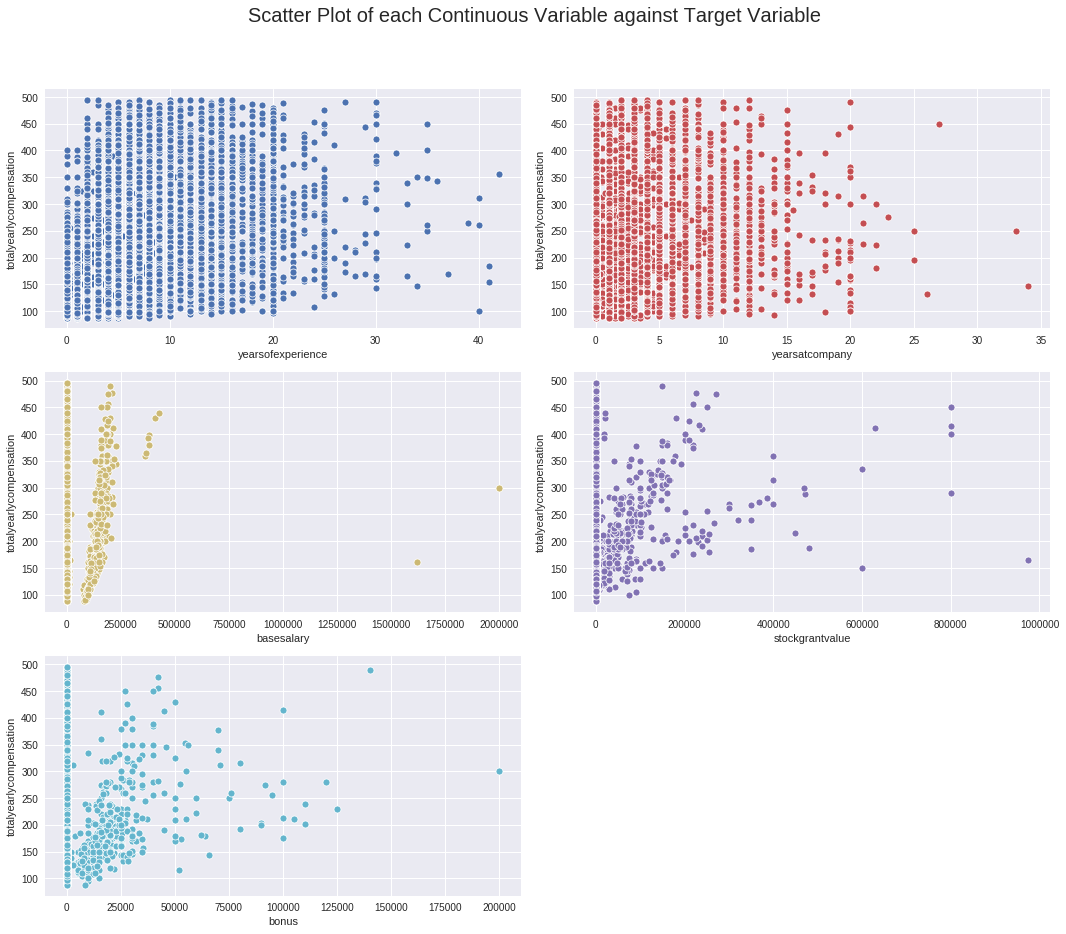

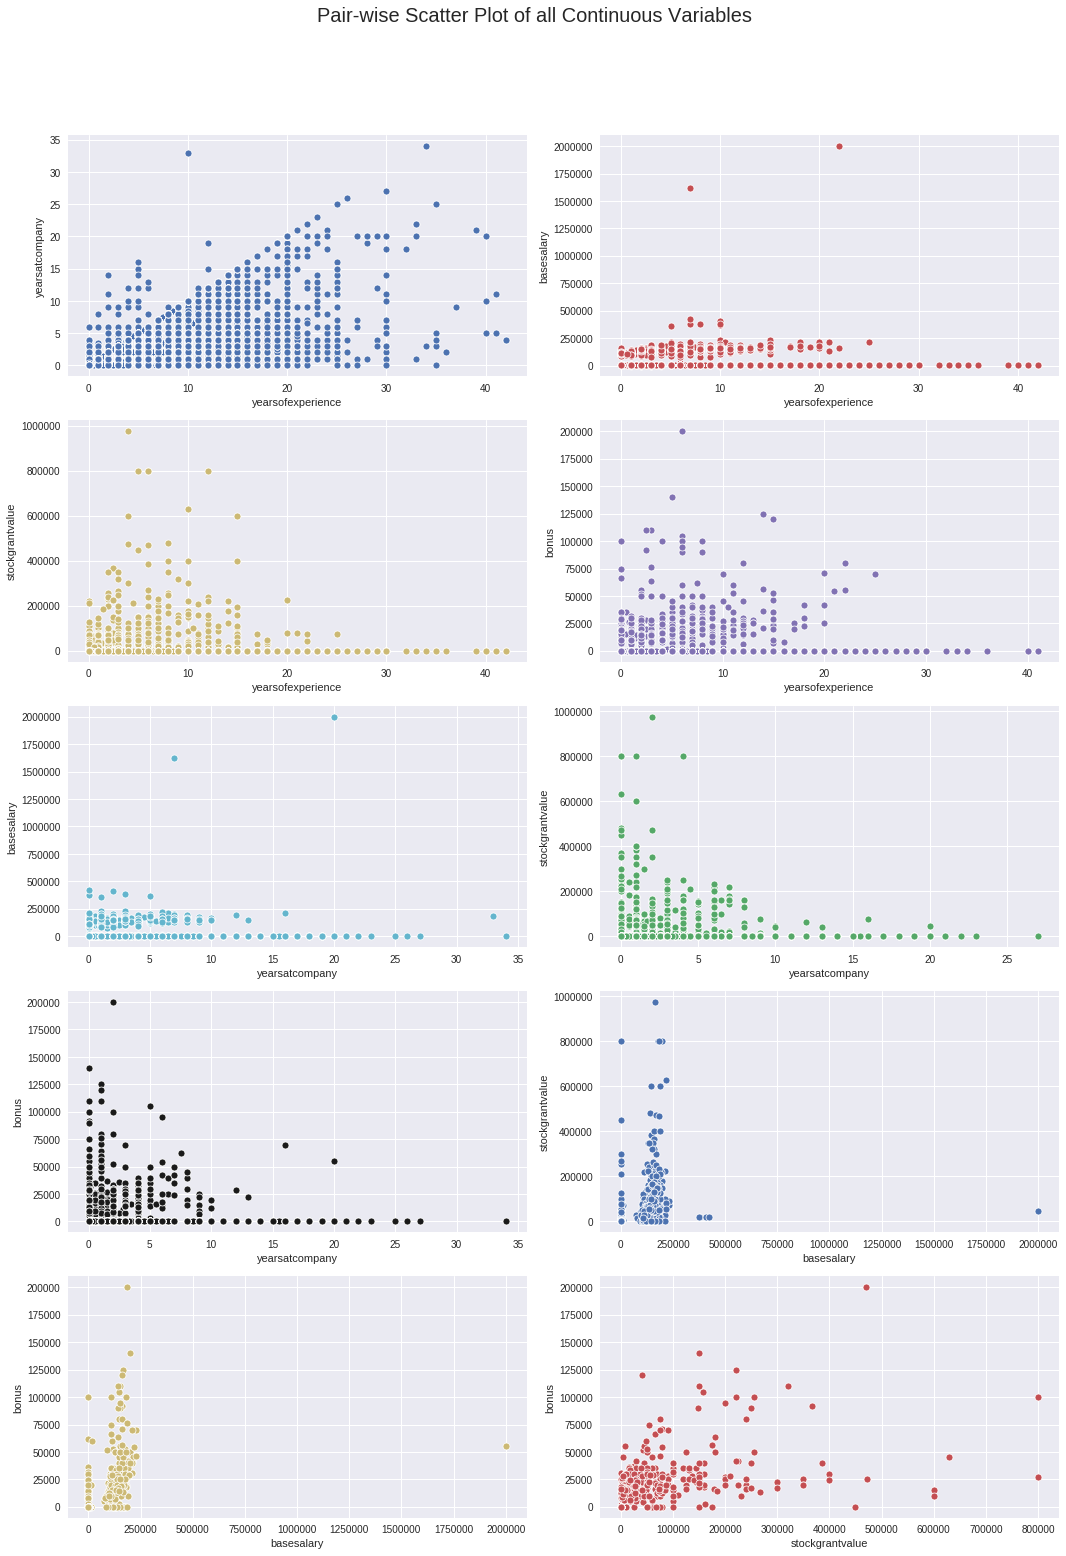

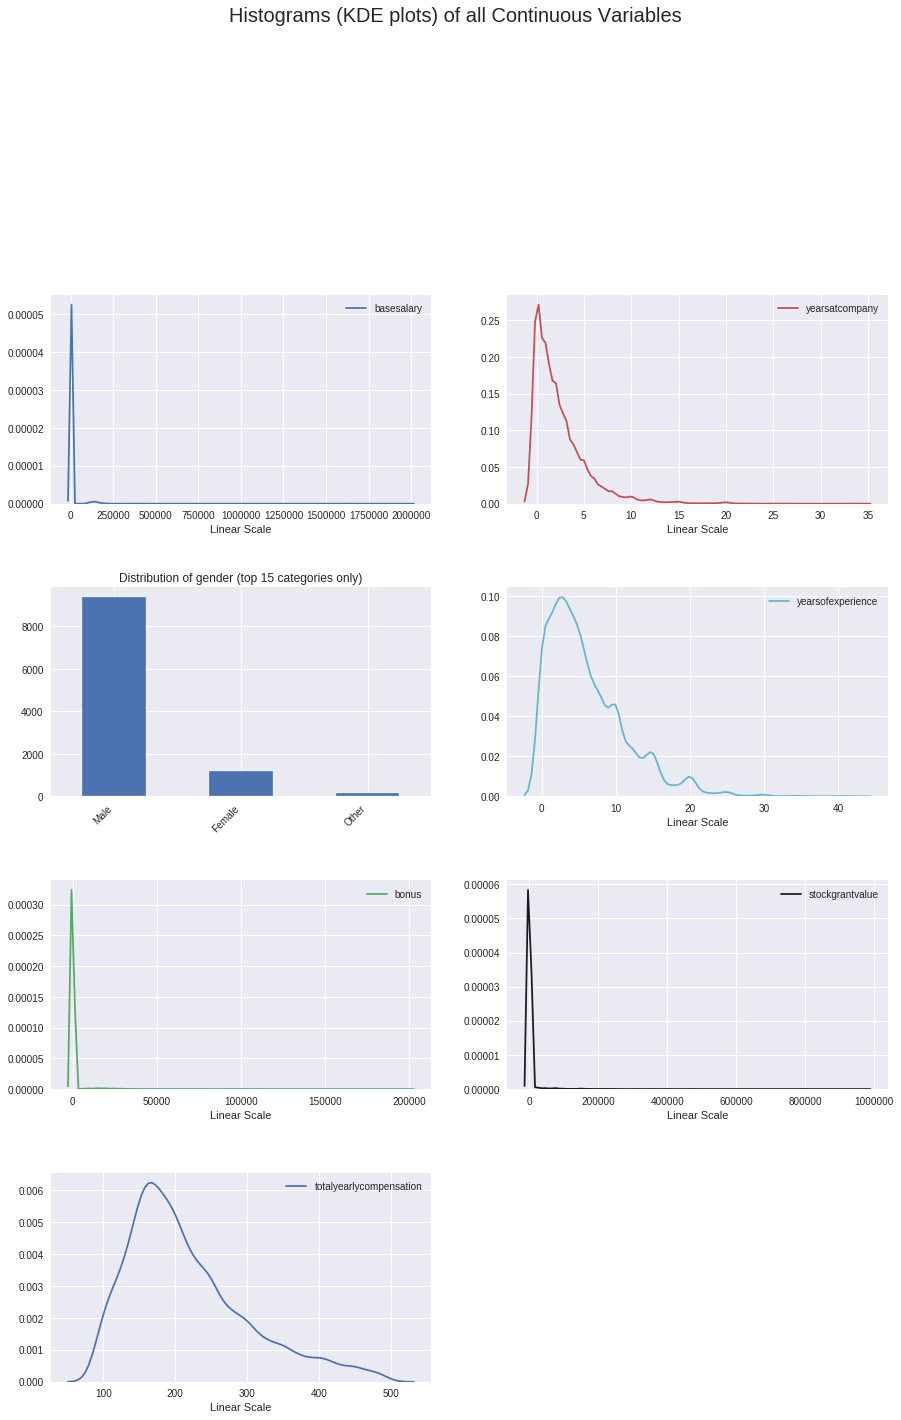

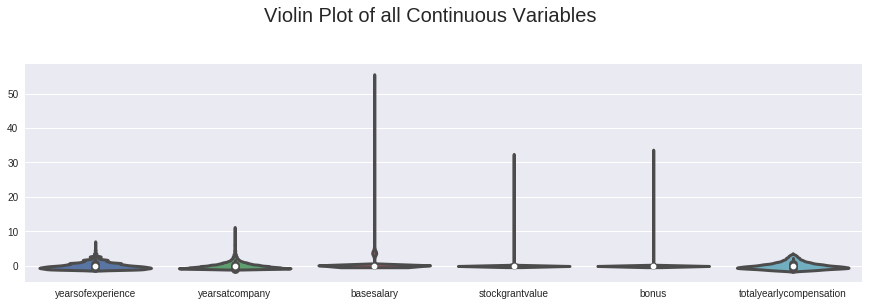

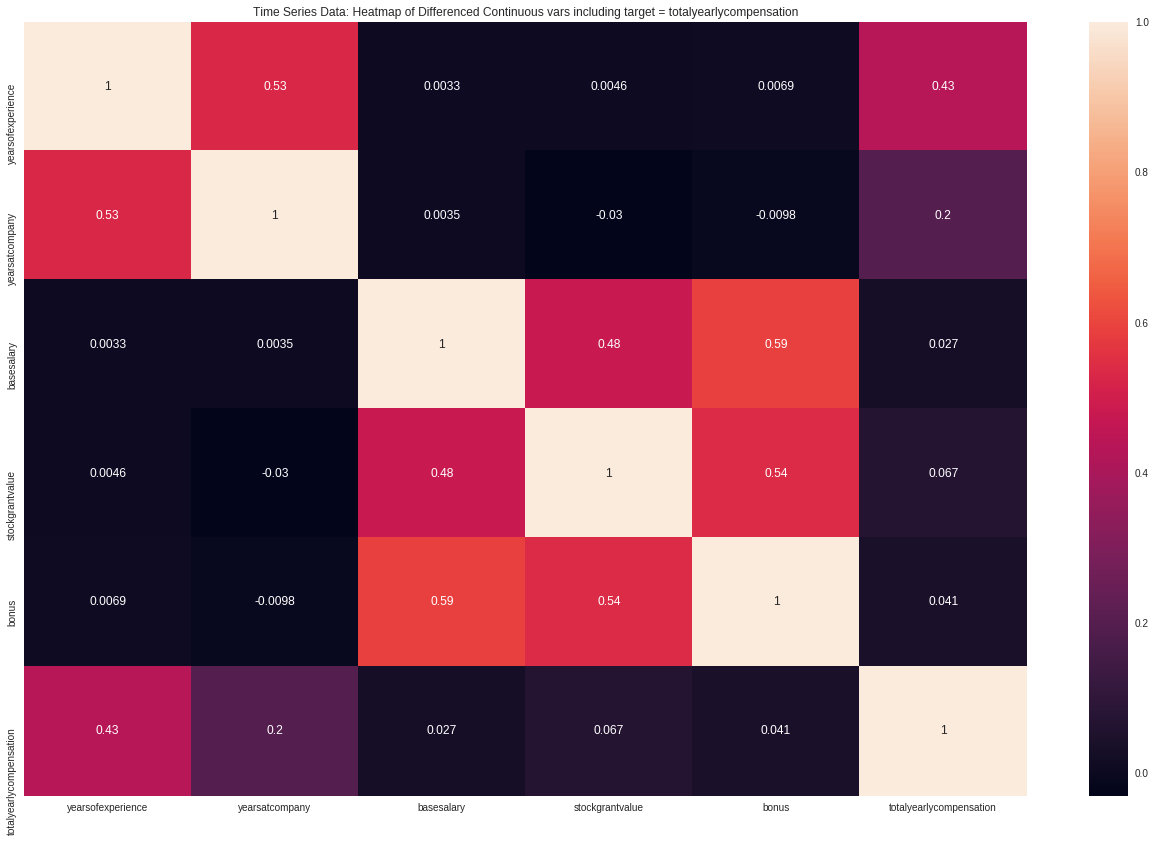

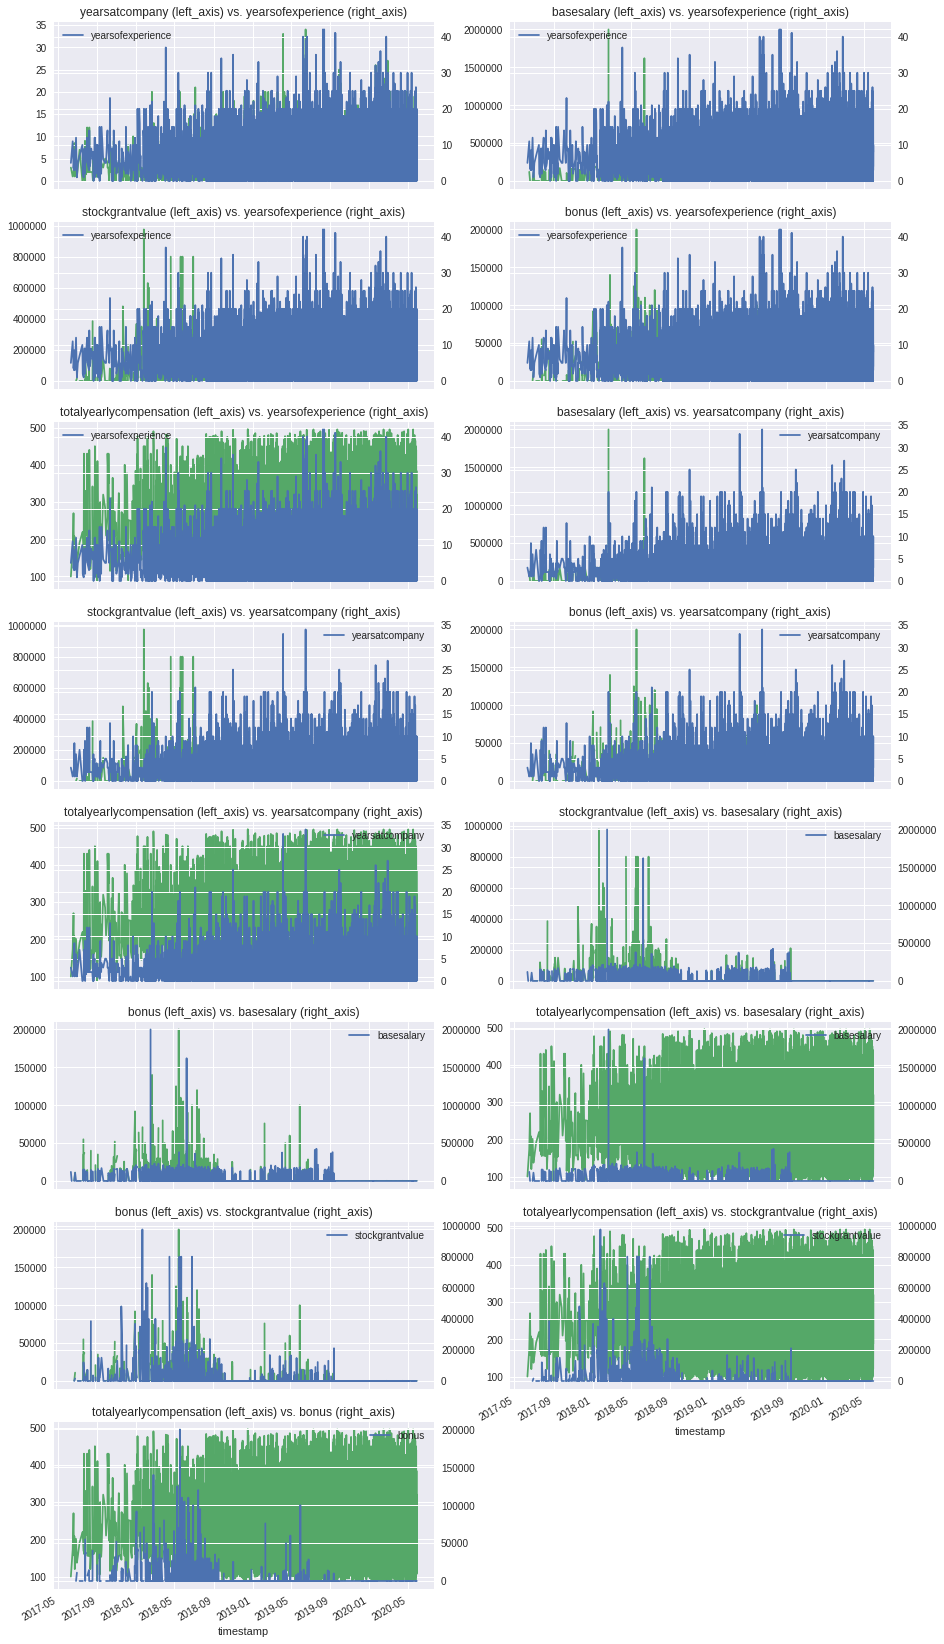

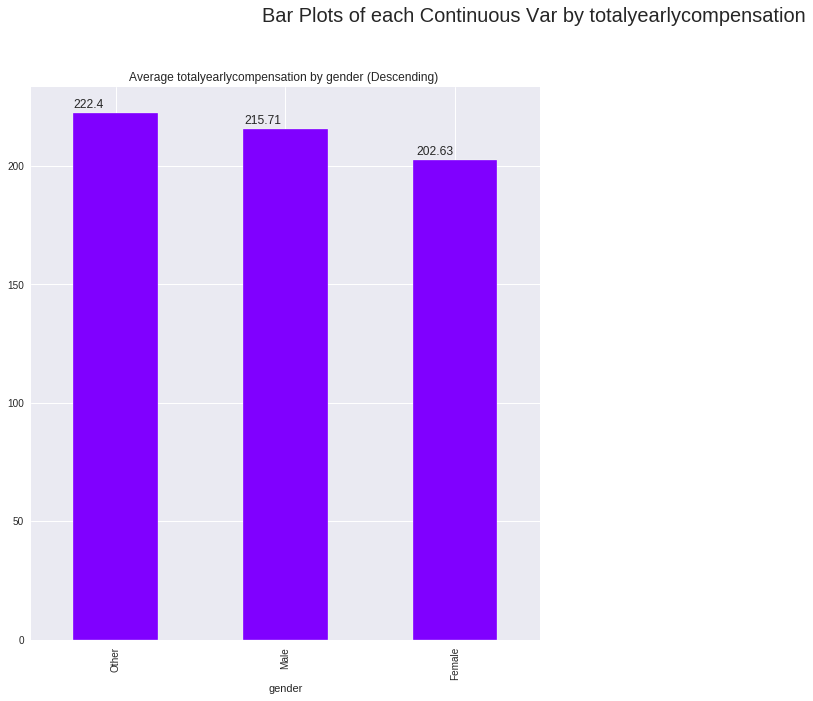

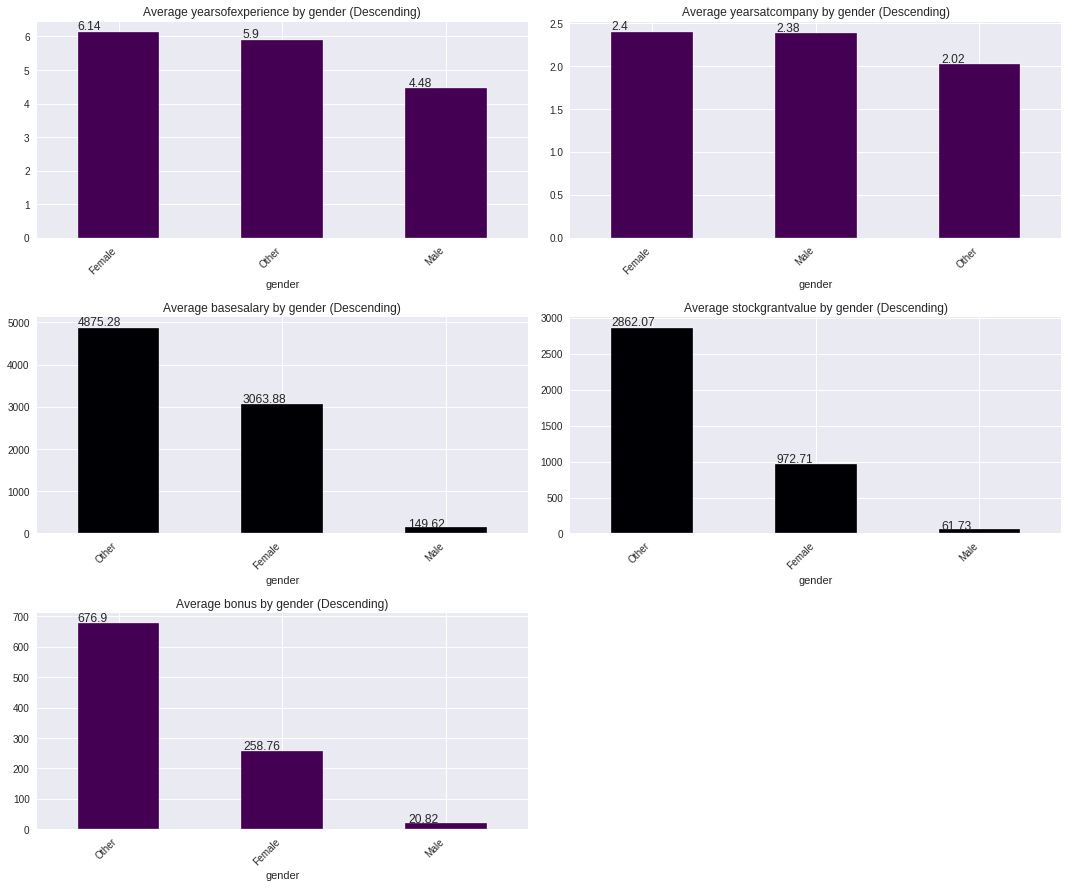

In [26]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = df[df['title'] == 'Software Engineer']
df_av = AV.AutoViz(filename="", sep=",", depVar="totalyearlycompensation", dfte=df, header=0, verbose=2, lowess=False, chart_format="svg", max_rows_analyzed=15000, max_cols_analyzed=30)